In [1]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import scipy.stats as st
import statsmodels.stats.multicomp as sm
from scipy.stats import norm, mannwhitneyu
import matplotlib.pyplot as plt
from pylab import rcParams
from tqdm.auto import tqdm
plt.style.use('ggplot')

In [29]:
df = pd.read_csv(r'C:\Users\Laba\Documents\crypto\coin_Bitcoin.csv', sep = ',')
df['Date'] = pd.to_datetime(df.Date)
df.dtypes
sg = pd.DataFrame()

In [30]:
path = r"C:\Users\Laba\Documents\crypto"
os.listdir (path)

['coin_Aave.csv',
 'coin_BinanceCoin.csv',
 'coin_Bitcoin.csv',
 'coin_Cardano.csv',
 'coin_ChainLink.csv',
 'coin_Cosmos.csv',
 'coin_CryptocomCoin.csv',
 'coin_Dogecoin.csv',
 'coin_EOS.csv',
 'coin_Ethereum.csv',
 'coin_Iota.csv',
 'coin_Litecoin.csv',
 'coin_Monero.csv',
 'coin_NEM.csv',
 'coin_Polkadot.csv',
 'coin_Solana.csv',
 'coin_Stellar.csv',
 'coin_Tether.csv',
 'coin_Tron.csv',
 'coin_Uniswap.csv',
 'coin_USDCoin.csv',
 'coin_WrappedBitcoin.csv',
 'coin_XRP.csv']

In [31]:
for (current_path, dirs, files) in os.walk(path):
    for file in files:
        data_path = (current_path + '\\' + file)
        a = pd.read_csv(data_path, sep = ',')
        df = pd.concat((df, a))
        

In [32]:
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2759,2760,XRP,XRP,2021-02-23 23:59:59,0.570989,0.379302,0.570989,0.473563,1.435902e+10,2.150165e+10
2760,2761,XRP,XRP,2021-02-24 23:59:59,0.499370,0.454759,0.474201,0.471832,8.015469e+09,2.142305e+10
2761,2762,XRP,XRP,2021-02-25 23:59:59,0.482517,0.429103,0.471776,0.434524,5.952354e+09,1.972912e+10
2762,2763,XRP,XRP,2021-02-26 23:59:59,0.450440,0.415559,0.434941,0.427900,6.476254e+09,1.942839e+10


In [25]:
df = df.groupby('Name',as_index = False)
       .agg({'High' : 'count'})

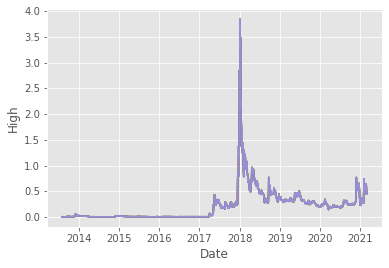

In [21]:
for (current_path, dirs, files) in os.walk(path):
    for i in [name for name in a]:
        data_path = (current_path + '\\' + file)
        a = pd.read_csv(data_path, sep = ',')
        a['Date'] = pd.to_datetime(a.Date)
        sns.lineplot(data = a, x= 'Date', y = 'High')

In [34]:
df[df.Name == 'Bitcoin' ].head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [39]:
df.Name.unique()

array(['Bitcoin', 'Aave', 'Binance Coin', 'Cardano', 'Chainlink',
       'Cosmos', 'Crypto.com Coin', 'Dogecoin', 'EOS', 'Ethereum', 'IOTA',
       'Litecoin', 'Monero', 'NEM', 'Polkadot', 'Solana', 'Stellar',
       'Tether', 'TRON', 'Uniswap', 'USD Coin', 'Wrapped Bitcoin', 'XRP'],
      dtype=object)